In [1]:
import pandas as pd
import numpy as np

# 算法介绍

![](https://tva1.sinaimg.cn/large/e6c9d24egy1h67lbj4oilj21480f6775.jpg)

* K均值算法有一些缺点，例如受初值和离群点的影响每次的结果不稳定、结果通常不是全局最优而是局部最优解、无法很好地解决数据簇分布差别比较大的情况（比如一类是另一类样本数量的100倍)、不太适用于离散分类等。但是瑕不掩瑜，K均值聚类的优点也是很明显和突出的，主要体现在：对于大数据集，K均值聚类算法相对是可伸缩和高效的，它的计算复杂度是O(NWK团接近于线性，其中N是数据对象的数目，K是聚类的簇数，t是迭代的轮数。尽管算法经常以局部最优结束，但一般情况下达到的局部最优己经可以满足聚类的需求。
* K均值算法的调优一般可以从以下几个角度出发。
(1)数据归一化和离群点处理。K均值聚类本质上是一种基于欧式距离度量的数据划分方法，均值和方差大的维度将对数据的聚类结果产生决定性的影响，所以未做归一化处理和统一单位的数据是无法直接参与运算和比较的。同时，离群点或者少量的噪声数据就会对均值产生较大的影响，导致中心偏移，因此使用K均值聚类算法之前通常需要对数据做预处理。

# 算法实现

In [89]:
def load_dataset(file):
    data_mat = list()
    file = open(file,'r')
    lines = file.readlines()
    for line in lines:
        cur_line = line.strip().split('\t')
        flt_line = map(float,cur_line)
        data_mat.append(list(flt_line))
    return np.mat(data_mat)

In [97]:
dataset = load_dataset('./testSet.txt')

In [102]:
random_center(dataset,2)

matrix([[-5.21812188,  1.81850364],
        [-4.2784063 ,  4.18669645]])

In [91]:
def distance_euclidean(vecA,vecB):
    return np.sqrt(np.sum(np.power(vecA-vecB,2)))

In [81]:
def random_center(dataset,k):
    n = dataset.shape[1]
    centroids = np.mat(np.zeros((k,n)))
    for j in range(n):
        min_j = min(dataset[:,j])
        range_j = float(max(dataset[:,j]) - min_j)
        centroids[:,j] = np.mat(min_j + range_j*np.random.rand(k,1))
    return centroids

In [130]:
def kMeans(dataSet,k,distMea=distance_euclidean,create_center =random_center):
    cluster_changed = True
    m = np.shape(dataSet)[0]
    centroids = create_center(dataSet,k)
    cluster_assignment = np.mat(np.zeros((m,2)))
    while cluster_changed:
        cluster_changed = False
        for i in range(m):
            min_distance,min_index = np.inf, -1
            for j in range(k):
                distance_JI = distMea(dataSet[i,:],centroids[j,:])
                if distance_JI < min_distance:
                    min_distance = distance_JI
                    min_index = j
            if cluster_assignment[i,0] != min_index:
                cluster_changed = True
            cluster_assignment[i,:] = min_index,min_distance**2
        print(centroids)
        for cent in range(k):
            ptsInClust = dataSet[np.nonzero(cluster_assignment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = np.mean(ptsInClust, axis=0)
    return centroids,cluster_assignment

In [125]:
def kMeans(dataSet, k, distMeas=distance_euclidean, createCent=random_center):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = np.inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = np.mean(ptsInClust, axis=0) #assign centroid to mean 
    return centroids, clusterAssment

In [131]:
dataset = load_dataset('./testSet.txt')
centroids,cluster_assignment = kMeans(dataset,4)

[[ 0.91182541 -1.85961957]
 [-4.04587877 -2.82201281]
 [ 2.30896371  4.47107745]
 [ 1.55213639 -0.69601934]]
[[ 2.28769    -3.23832819]
 [-3.54251791 -2.066412  ]
 [ 0.3326791   3.28239277]
 [ 2.6272763   0.1930647 ]]
[[ 2.54173689 -3.11892933]
 [-3.50009376 -2.50791867]
 [-0.42864426  3.26104032]
 [ 3.274962    1.2058866 ]]
[[ 2.54173689 -3.11892933]
 [-3.53973889 -2.89384326]
 [-1.6334182   3.03655888]
 [ 3.00278739  2.19743744]]
[[ 2.65077367 -2.79019029]
 [-3.53973889 -2.89384326]
 [-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]]


In [121]:
centroids

matrix([[-3.38237045, -2.9473363 ],
        [-0.02298687,  2.99472915],
        [ 2.8692781 , -2.54779119]])

# sklearn实现

In [132]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

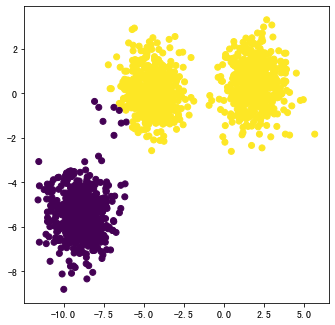

In [142]:
n_samples = 1500
random_state = 170

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:,0],X[:,1],c=y_pred)